# 多层感知机的从零开始实现

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [2]:
# 初始化模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [3]:
# 定义激活函数
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [4]:
# 定义模型（网络）
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

In [5]:
# 定义损失函数
loss = nn.CrossEntropyLoss(reduction='none')

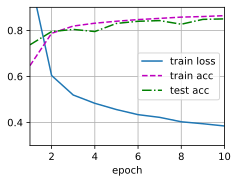

In [6]:
# 训练
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

预测准确度：8499.0/10000.0=0.8499


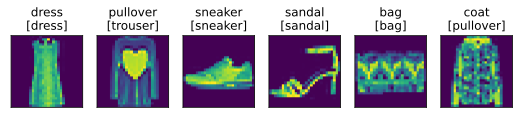

In [8]:
# 预测
def predict_ch3(net, test_iter, n=6):
    """预测标签（定义见第3章）"""
    metric = d2l.Accumulator(2)  # 正确预测数、预测总数
    for X, y in test_iter:
        y_hat = net(X)
        metric.add(d2l.accuracy(y_hat, y), y.numel())  # numel()获取张量中元素的总数

    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = ["{}\n[{}]".format(true, pred) for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])
    print("预测准确度：{}/{}={}".format(metric[0], metric[1], metric[0] / metric[1]))


predict_ch3(net, test_iter)